In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
import torch
import seaborn as sns

In [2]:
import sys
sys.path.append('code/BalancingControl')
import tmaze_utils as tu
import misc

Running on device cpu


In [3]:
training_file = os.path.join('raw_data', 'Training.csv')

In [4]:
training_csv = pd.read_csv(training_file)
print(training_csv.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')


In [5]:
training_csv

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,DAY,1,2,3,4,5,6.000000,7.000000,8.000000,9.000000,...,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,NaN,NaN,NaN,NaN
1,MEAN,27.5,22.5,35,37.5,54.28571429,70.000000,83.333333,88.571429,86.666667,...,92.500000,85.000000,95.000000,90.000000,95.000000,97.500000,NaN,NaN,NaN,NaN
2,SD,21.21320344,19.82062418,29.76095237,22.51983253,22.25394561,23.904572,8.164966,10.690450,23.094011,...,10.350983,14.142136,9.258201,10.690450,9.258201,7.071068,NaN,NaN,NaN,NaN
3,SEM,7.5,7.007648882,10.52208562,7.961963146,8.411200825,8.451543,3.333333,4.040610,13.333333,...,3.659625,5.000000,3.273268,3.779645,3.273268,2.500000,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,12,U,U,B,B,B,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
302,13,U,U,B,B,B,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
303,14,U,U,B,B,U,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN
304,15,U,U,B,U,B,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN


In [6]:
training_csv[training_csv['Unnamed: 0'] == '12']


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
29,12,R,R,R,R,R,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
45,12,R,R,R,R,R,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
61,12,R,R,R,R,L,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN
77,12,L,R,R,R,L,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN
93,12,R,L,R,L,R,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN
109,12,R,L,L,L,L,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN
125,12,L,L,R,L,L,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN
141,12,U,U,U,B,U,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN
157,12,L,R,L,L,L,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN
173,12,L,L,L,L,L,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN


In [7]:
test_arr = list(set(training_csv['Unnamed: 0']))
print(test_arr)
dig_arr = [str(t).isdigit() for t in test_arr]
animal_nr = [int(t) for i,t in enumerate(test_arr) if dig_arr[i]]
animal_nr.sort()
print(animal_nr)

['SD', '7', '2', 'Day 13 260419', '1', 'Day 2 090419', 'Day 18 030519', 'Day 14 290419', 'SEM', 'Day 17 020519', 'Day 3 100419', 'Day 11 240419', 'Day 5 120419', '6', 'Day 16 010519', '4', '14', 'Day 7 170419', '16', 'DAY', '8', 'MEAN', '3', '12', '5', 'Day 19 040519', 'Day 8 180419', 'Day 15 300419', 'Day 12 250419', 'Day 6 150419', '15', nan, 'Day 10 230419', '11', '10', 'Day 4 110419', '13', 'Day 9 220419']
[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16]


In [8]:
groups = {"control": animal_nr[:8-1], "exposed": animal_nr[8:]}

print(groups)

{'control': [1, 2, 3, 4, 5, 6, 7], 'exposed': [10, 11, 12, 13, 14, 15, 16]}


In [9]:
mapping = {"R": 0, "L": 1, "U": 1, "B": 0}

reward_mapping = {"R": 0, "L": 2, "B": 2, "U": 0}

In [10]:
training_trials = 50
test_trials = 5

total_trials = 2*(training_trials+test_trials)

In [11]:
def convert_letter_actions_to_numbers(df, k):

    actions = np.zeros((total_trials, 1)) - 1
    mask = np.zeros((total_trials,1)).astype(bool)
    observations = np.zeros((total_trials, 2))
    rewards = np.ones((total_trials, 2))

    count = 0
    for r in df[df['Unnamed: 0'] == str(k)].iterrows():
        letter = r[1][f'Unnamed: {1}'].strip()
        if letter == 'L' or letter == 'R':
            pass
        elif letter == 'B' or letter == 'U':
            if count < training_trials:
                count = training_trials
            else:
                count = 2*training_trials + test_trials
            pass
        else:
            print("Handle:", r[1][f'Unnamed: {1}'])
        for i in range(1, 6):
            # print(count, r[1][f'Unnamed: {i}'])
            print(r[1][f'Unnamed: {i}'])
            if r[1][f'Unnamed: {i}'] is np.nan:
                mask[count] = False
            else:
                letter_col = r[1][f'Unnamed: {i}'].strip()
                mask[count] = True
                actions[count] = mapping[letter_col]
                observations[count,1] = mapping[letter_col] + 1
                rewards[count,1] = reward_mapping[letter_col]
            count += 1

    return actions, mask, observations, rewards


def create_group_data(group_name, df):

    group_size = len(groups[group_name])
    data_list = []
    plot_dict = {"animal": np.zeros(total_trials*group_size), "correct": np.zeros(total_trials*group_size), "valid": np.zeros(total_trials*group_size).astype(bool), 
                 "group": [group_name]*total_trials*group_size, "trial": np.zeros(total_trials*group_size)}

    for i,s in enumerate(groups[group_name]):
        print(s)
        actions, mask, observations, rewards = convert_letter_actions_to_numbers(df, s)
        data_list.append({"subject": torch.tensor([s]), "actions": torch.from_numpy(actions).long(), "observations": torch.from_numpy(observations).long(), 
                          "rewards":torch.from_numpy(rewards).long(), "states": torch.from_numpy(observations).long(), 'valid': torch.from_numpy(mask)})
        plot_dict["animal"][i*total_trials:(i+1)*total_trials] = s
        plot_dict["correct"][i*total_trials:(i+1)*total_trials] = rewards[:,1]//2
        plot_dict["valid"][i*total_trials:(i+1)*total_trials] = mask[...,0]
        plot_dict["trial"][i*total_trials:(i+1)*total_trials] = list(range(total_trials))


    return data_list, plot_dict

In [12]:
a, m, o, r = convert_letter_actions_to_numbers(training_csv, 12)

R
R
R
R
R
R
R
R
R
R
R
R
R
R
L
L
R
R
R
L
R
L
R
L
R
R
L
L
L
L
L
L
R
L
L
U
U
U
B
U
L
R
L
L
L
L
L
L
L
L
R
L
L
L
L
L
L
L
L
R
L
L
L
L
R
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
U
U
B
B
B


In [13]:
a

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
      

In [14]:
m

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [15]:
o

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 2.],
       [0., 2.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 2.],
       [0., 1.],
       [0., 2.],
       [0., 1.],
       [0., 2.],
       [0., 1.],
       [0., 1.],
       [0., 2.],
       [0., 2.],
       [0., 2.],
       [0., 2.],
       [0., 2.],
       [0., 2.],
       [0., 1.],
       [0., 2.],
       [0., 2.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 2.],
       [0., 2.],
       [0., 2.],
       [0., 1.],
       [0., 2.],
       [0., 2.],
       [0., 1.],
       [0., 2.],
       [0., 2.

In [16]:
r

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 2.],
       [1., 2.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 2.],
       [1., 0.],
       [1., 2.],
       [1., 0.],
       [1., 2.],
       [1., 0.],
       [1., 0.],
       [1., 2.],
       [1., 2.],
       [1., 2.],
       [1., 2.],
       [1., 2.],
       [1., 2.],
       [1., 0.],
       [1., 2.],
       [1., 2.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 2.],
       [1., 0.],
       [1., 2.],
       [1., 0.],
       [1., 2.],
       [1., 2.

In [17]:
group_name = "control"

data_list_control, plot_dict_control = create_group_data(group_name, training_csv)
structured_data_control = tu.restructure_behavioral_data(data_list_control)

base_dir = "processed_data"
fname_data = os.path.join(base_dir, f"TMaze_{group_name}_structured_data.json")
misc.save_file(structured_data_control, fname_data)

1
R
L
R
R
R
L
L
R
L
R
L
R
R
R
R
R
R
R
R
L
R
R
R
R
L
R
L
R
L
R
L
R
L
L
L
L
L
L
R
L
B
U
U
U
U
L
L
L
L
L
L
L
L
L
R
L
L
L
L
L
L
L
L
R
L
L
L
L
L
R
L
R
L
L
L
L
L
L
L
L
L
L
L
L
L
B
B
B
U
B
2
R
L
L
R
R
R
R
R
R
L
R
R
R
L
R
L
R
L
L
R
R
R
L
L
R
L
L
R
L
L
L
R
L
L
L
R
L
L
L
L
U
U
B
U
B
L
L
L
L
L
R
L
L
L
L
L
L
L
L
R
L
L
L
R
L
L
L
L
L
L
R
L
L
L
L
L
L
L
L
L
L
L
L
L
L
U
B
B
B
B
3
L
R
R
R
L
R
R
R
L
R
L
R
L
R
R
R
R
R
R
L
L
L
R
L
R
L
R
L
L
R
L
L
L
L
L
R
L
L
L
L
B
U
U
U
U
L
L
R
L
L
L
L
L
L
L
L
L
L
R
L
L
R
L
L
L
L
L
L
R
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
B
U
B
B
B
4
L
L
R
L
R
R
R
L
R
R
L
R
L
L
L
L
L
R
L
R
L
L
L
L
R
L
L
L
L
L
B
U
B
U
U
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
B
U
U
U
B
5
R
R
R
R
R
L
R
R
R
R
R
R
R
R
L
L
L
R
R
R
L
L
R
L
R
L
L
R
R
R
L
L
R
L
L
L
L
L
R
L
B
B
B
U
U
L
R
L
R
L
L
L
L
L
R
L
R
L
L
L
L
R
R
L
L
L
L
L
L
L
L
L
L
L
L
R
L
L
L
L
L
L
L
L
L
B
U
B
U
B
6
L
R
L
R
R
R
R
R
R
R
R
R
L
R
R
R
R
R
R
R
R
L
R
R
L
L
L
R
L
R
L
R
L
L
L
L
L
L
L
L
B
B
U
U


/home/sarah/src/TMaze/code/BalancingControl/tmaze_utils.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_val = torch.cat([torch.tensor(d["valid"]) for d in data], dim=-1)


In [18]:
group_name = "exposed"

data_list_exposed, plot_dict_exposed = create_group_data(group_name, training_csv)
structured_data_exposed = tu.restructure_behavioral_data(data_list_exposed)

base_dir = "processed_data"
fname_data = os.path.join(base_dir, f"TMaze_{group_name}_structured_data.json")
misc.save_file(structured_data_exposed, fname_data)

10
R
R
R
R
R
R
R
R
R
R
R
R
L
R
R
R
R
R
R
R
R
L
L
L
L
L
L
L
L
L
B
U
U
B
B
R
R
L
L
L
L
L
L
L
L
L
R
L
L
L
L
L
L
L
L
L
L
L
R
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
B
B
B
B
U
11
R
L
R
R
R
R
R
R
L
R
L
R
L
R
L
R
R
L
L
L
L
L
R
L
L
L
R
L
L
L
B
U
U
B
U
R
L
L
L
L
L
L
L
R
L
L
L
L
L
L
L
L
R
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
R
L
L
L
L
R
L
U
U
U
B
B
12
R
R
R
R
R
R
R
R
R
R
R
R
R
R
L
L
R
R
R
L
R
L
R
L
R
R
L
L
L
L
L
L
R
L
L
U
U
U
B
U
L
R
L
L
L
L
L
L
L
L
R
L
L
L
L
L
L
L
L
R
L
L
L
L
R
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
U
U
B
B
B
13
R
R
L
R
L
L
R
R
R
L
L
R
R
L
L
L
L
L
L
L
 L
L
L
L
L
U
B
U
U
B
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
R
R
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
U
U
B
B
B
14
L
R
L
R
L
L
R
R
L
L
L
R
L
L
L
R
R
L
L
L
R
R
L
R
L
L
L
L
L
L
R
L
L
L
L
B
B
B
U
U
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
R
L
L
L
L
L
L
L
L
U
U
B
B
U
15
R
L
L
R
R
L
L
R
R
R
L
R
L
R
L
L
L
R
L
L
L
L
R
L
R
L
R
L
L
L
L
L
L
L
L
B
U
U
B
B
L

In [19]:
plot_dict = {"animal": np.append(plot_dict_control["animal"], plot_dict_exposed["animal"]), "correct": np.append(plot_dict_control["correct"], plot_dict_exposed["correct"]), 
             "group": plot_dict_control["group"] + plot_dict_exposed["group"], "valid": np.append(plot_dict_control["valid"], plot_dict_exposed["valid"]),
             "trial": np.append(plot_dict_control["trial"], plot_dict_exposed["trial"])}

In [20]:
plot_df = pd.DataFrame(plot_dict)

/home/sarah/anaconda3/envs/two_stage/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/sarah/anaconda3/envs/two_stage/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


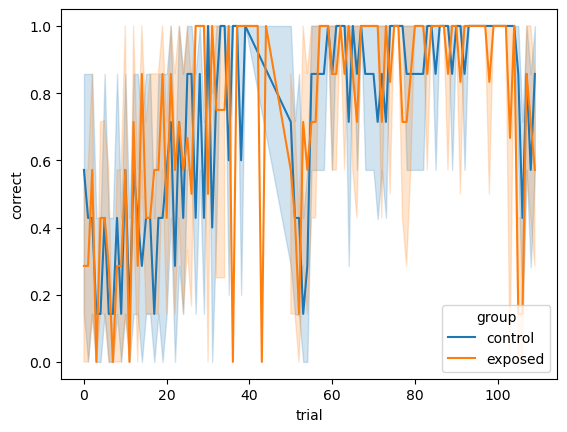

In [21]:
plt.figure()
sns.lineplot(data=plot_df[plot_df["valid"]==True], x="trial", y="correct", hue="group")
plt.show()

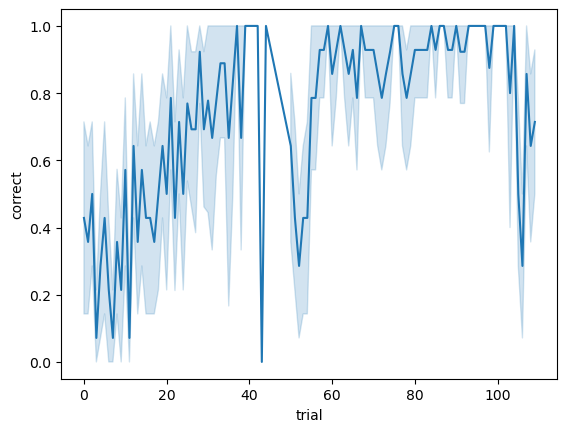

In [22]:
plt.figure()
sns.lineplot(data=plot_df[plot_df["valid"]==True], x="trial", y="correct")
plt.show()